## German Credit Dataset Analysis and Modeling

This notebook will guide you through an extensive exploratory data analysis (EDA), building logistic regression and XGBoost models, hyperparameter optimization, creating lift/gain tables, and appending scores to the original data.

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### 2. Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../../data/raw/telco.csv')
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [4]:
df = df.drop(['Churn Score','Customer Status'], axis=1)

### 3. Exploratory Data Analysis (EDA)
#### Basic Information and Descriptive Statistics

In [5]:
# Basic information
df.info()

# Descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,6500.000000


#### Visualizations

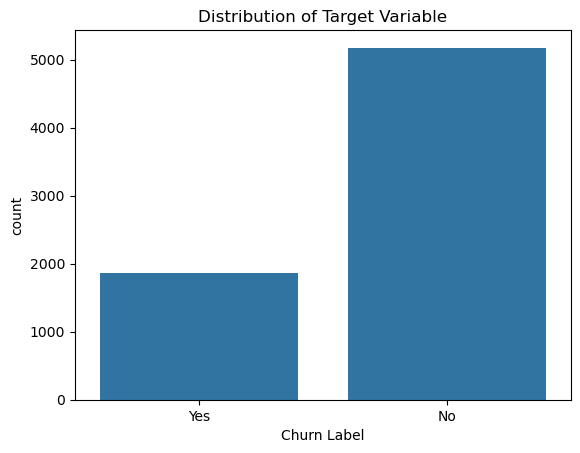

In [6]:
# Distribution of target variable
sns.countplot(x='Churn Label', data=df)
plt.title('Distribution of Target Variable')
plt.show()

<Figure size 1200x600 with 0 Axes>

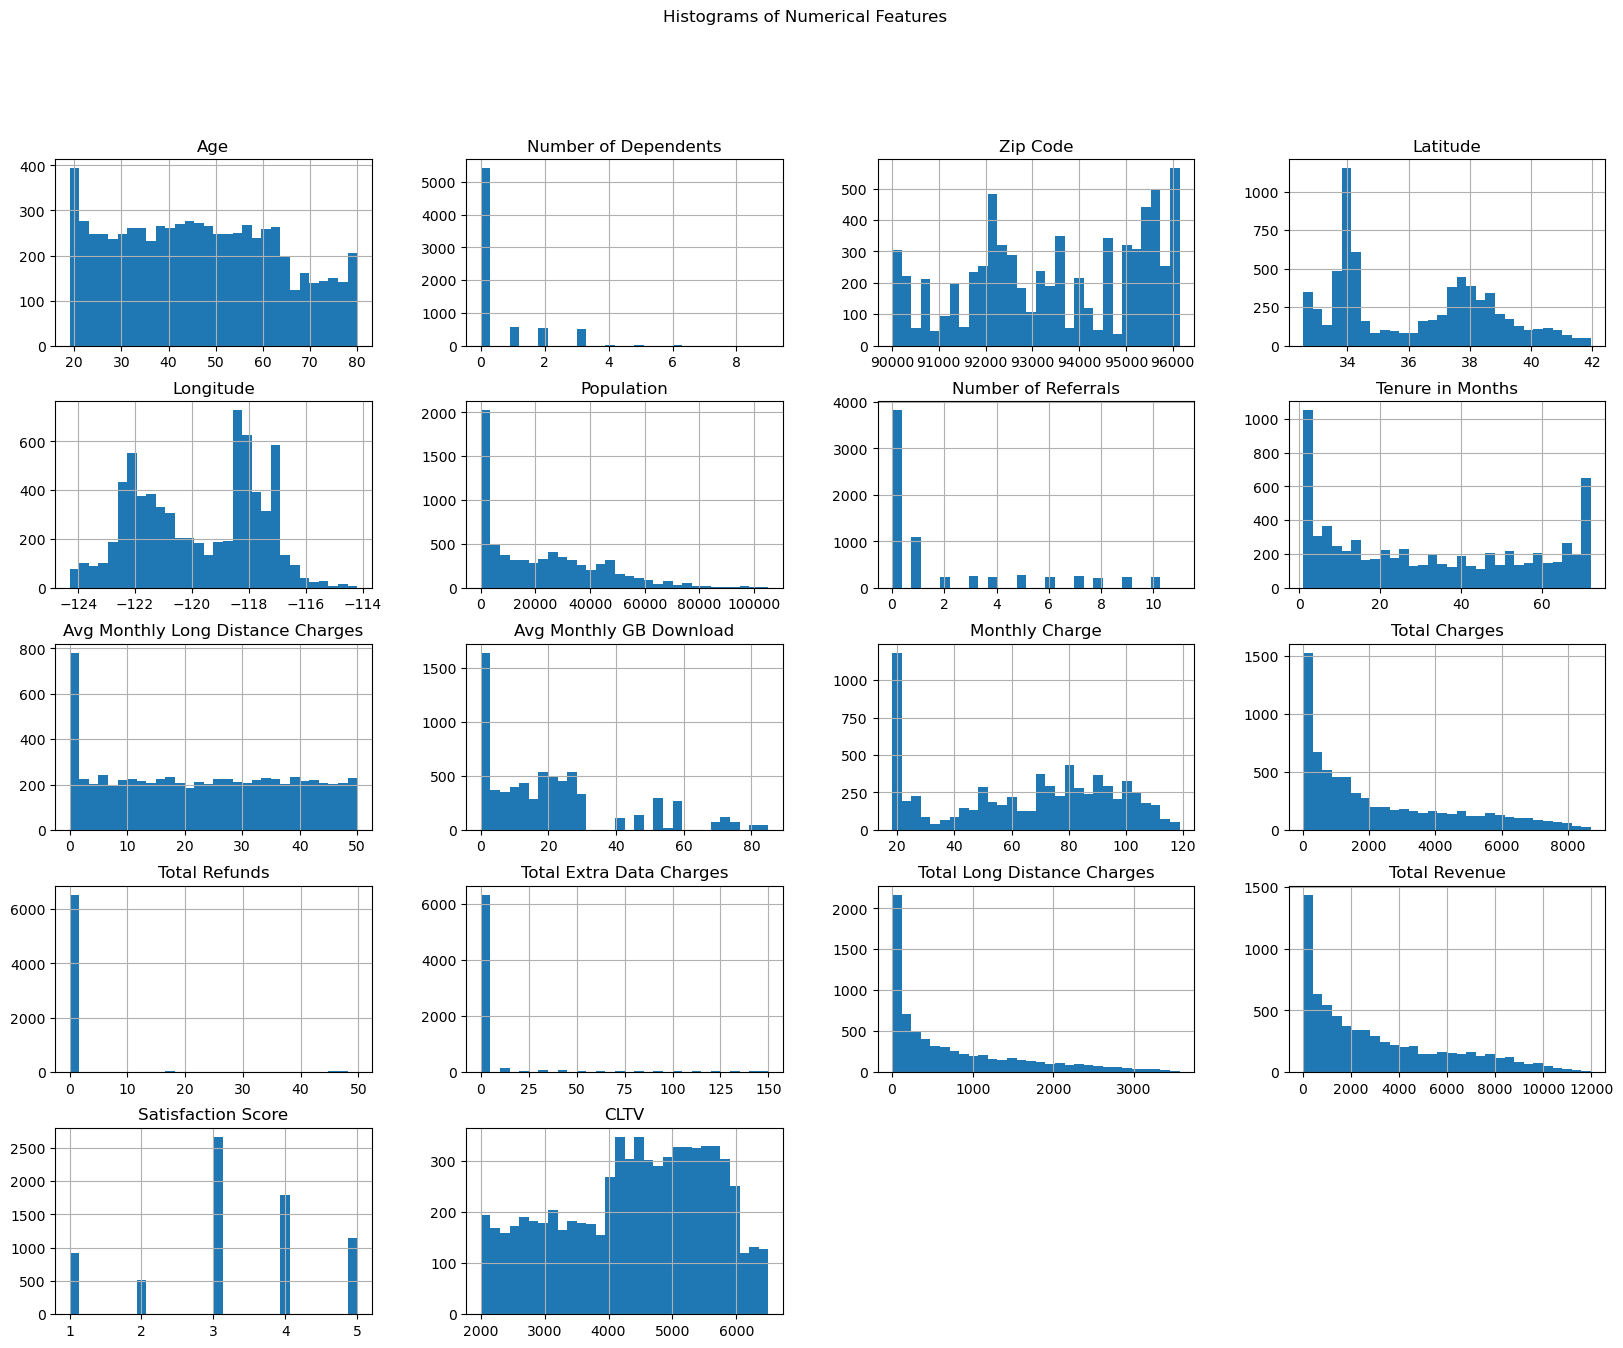

In [7]:
# Visualizing numerical features
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

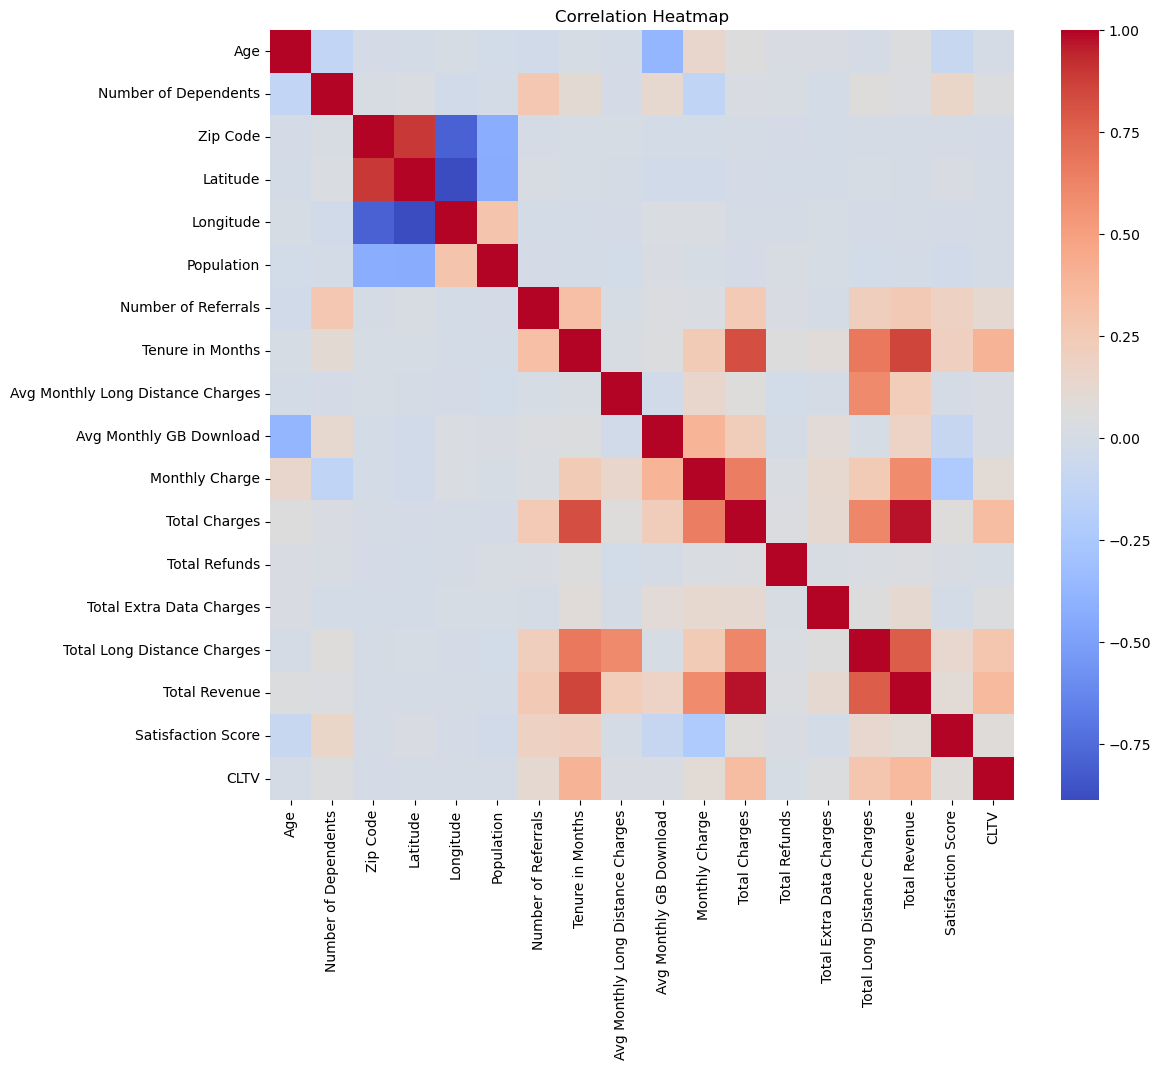

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Handling Missing Values and Encoding Categorical Variables

In [9]:
df['Churn Label'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn Label, dtype: object

In [10]:
# Check for missing values
print(df.isnull().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [11]:
# Drop rows with missing target variable (Churn)
df = df.dropna(subset=['Churn Label'])
df['Churn Label']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn Label, Length: 7043, dtype: object

In [12]:
# Map target variable to binary values
df['Churn Label'] = df['Churn Label'].map({'No': 0, 'Yes': 1})
print(df['Churn Label'].head())

0    1
1    1
2    1
3    1
4    1
Name: Churn Label, dtype: int64


In [13]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Verify the new dataframe structure
print(df.head())
print(df.info())

   Age  Number of Dependents  Zip Code   Latitude   Longitude  Population  \
0   78                     0     90022  34.023810 -118.156582       68701   
1   74                     1     90063  34.044271 -118.185237       55668   
2   71                     3     90065  34.108833 -118.229715       47534   
3   78                     1     90303  33.936291 -118.332639       27778   
4   80                     1     90602  33.972119 -118.020188       26265   

   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                    0                 1                               0.00   
1                    1                 8                              48.85   
2                    0                18                              11.33   
3                    1                25                              19.76   
4                    1                37                               6.33   

   Avg Monthly GB Download  ...  Churn Reason_Lack of self-ser

In [15]:
df.head()
df['Churn Label'].head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Label, dtype: int64

In [16]:
# Split the data into features and target variable
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 8216) (1409, 8216) (5634,) (1409,)


### 5. Standardize the Features

In [17]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6. Train Logistic Regression Model

In [18]:
# Train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

### 7. Evaluate Logistic Regression Model

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1009
           1       1.00      0.90      0.95       400

    accuracy                           0.97      1409
   macro avg       0.98      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

Confusion Matrix:
[[1009    0]
 [  40  360]]
Accuracy Score:
0.971611071682044
ROC AUC Score: 0.9989147670961348


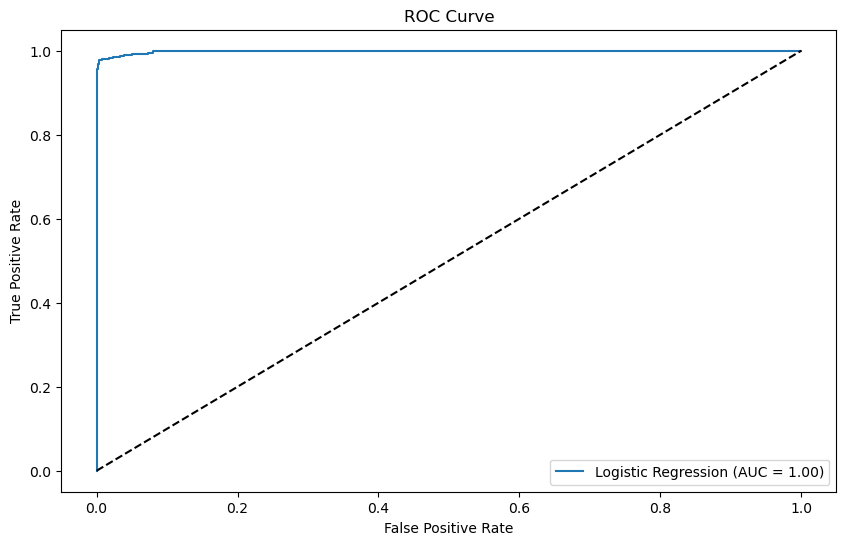

In [19]:
# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


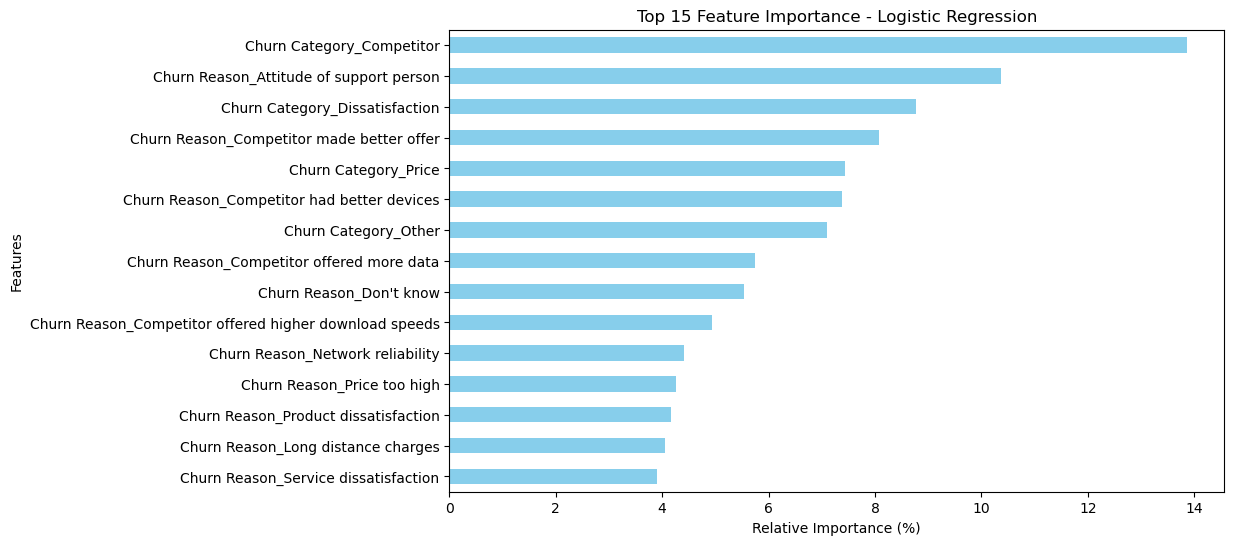

In [20]:
# Feature importance for Logistic Regression
importance_log = pd.Series(log_model.coef_[0], index=X.columns).sort_values(ascending=False).head(15)
importance_log = 100.0 * (importance_log / importance_log.sum())
plt.figure(figsize=(10, 6))
importance_log.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 15 Feature Importance - Logistic Regression')
plt.xlabel('Relative Importance (%)')
plt.ylabel('Features')
plt.show()


### 8. Train XGBoost Model with Hyperparameter Optimization

In [21]:
# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### 9. Evaluate XGBoost Model

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      0.99      0.99       400

    accuracy                           1.00      1409
   macro avg       1.00      0.99      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1009    0]
 [   4  396]]
Accuracy Score:
0.9971611071682044
ROC AUC Score: 0.999898414271556


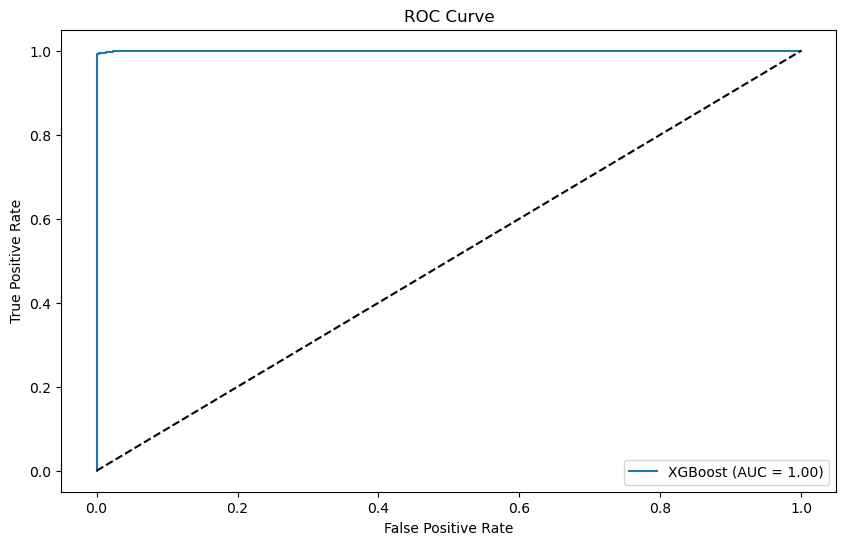

In [22]:
# Make predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_xgb))

# ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


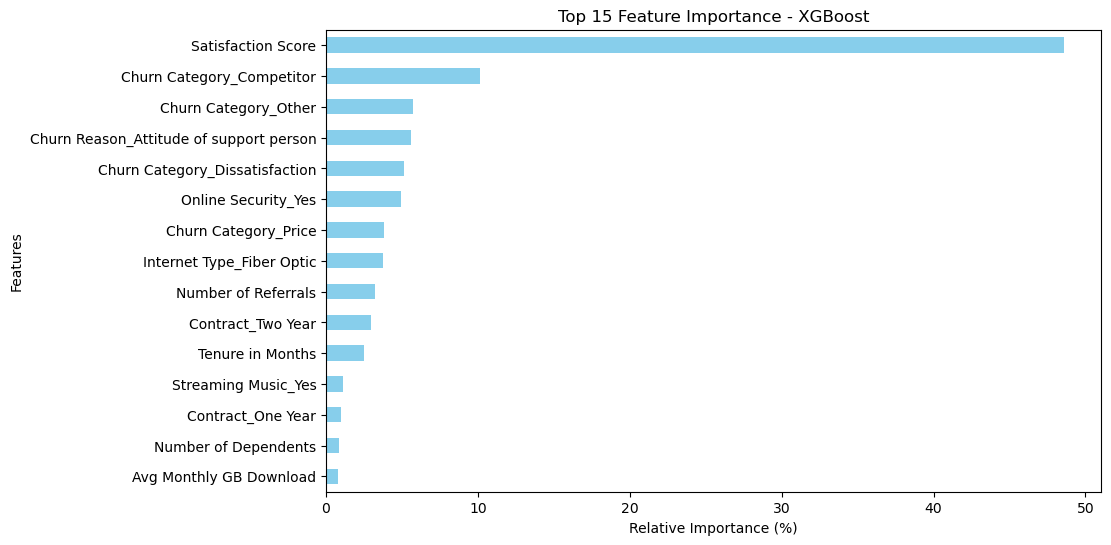

In [23]:
# Feature importance for XGBoost
importance_xgb = pd.Series(best_xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
importance_xgb = 100.0 * (importance_xgb / importance_xgb.sum())
plt.figure(figsize=(10, 6))
importance_xgb.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 15 Feature Importance - XGBoost')
plt.xlabel('Relative Importance (%)')
plt.ylabel('Features')
plt.show()


### 10. Create Lift/Gain Tables

In [25]:
def create_lift_gain_table(model, X_test, y_test, n_bins=10):
    y_probs = model.predict_proba(X_test)[:, 1]
    data = pd.DataFrame({'Actual': y_test, 'Probability': y_probs})
    data['Decile'] = pd.qcut(data['Probability'], q=n_bins, labels=False)
    decile_table = data.groupby('Decile').agg({
        'Actual': ['sum', 'count'],
        'Probability': 'mean'
    }).reset_index()
    decile_table.columns = ['Decile', 'Total Actual', 'Count', 'Mean Probability']
    decile_table = decile_table.sort_values(by='Decile', ascending=False).reset_index(drop=True)
    decile_table['Cumulative Actual'] = decile_table['Total Actual'].cumsum()
    decile_table['Cumulative Percentage'] = decile_table['Cumulative Actual'] / decile_table['Total Actual'].sum()
    decile_table['Lift'] = decile_table['Cumulative Percentage'] / ((decile_table.index + 1) / n_bins)
    return decile_table

# Lift/Gain table for Logistic Regression
lift_gain_log = create_lift_gain_table(log_model, X_test, y_test)

In [26]:
lift_gain_log

,Decile,Total Actual,Count,Mean Probability,Cumulative Actual,Cumulative Percentage,Lift
0,9,141,141,0.995789,141,0.3525,3.525000
1,8,141,141,0.972838,282,0.7050,3.525000
2,7,112,141,0.537896,394,0.9850,3.283333
3,6,6,141,0.013163,400,1.0000,2.500000
4,5,0,140,0.003583,400,1.0000,2.000000
5,4,0,141,0.001387,400,1.0000,1.666667
6,3,0,141,0.000573,400,1.0000,1.428571
7,2,0,141,0.000250,400,1.0000,1.250000
8,1,0,141,0.000109,400,1.0000,1.111111
9,0,0,141,0.000032,400,1.0000,1.000000


In [28]:
# Lift/Gain table for XGBoost
lift_gain_xgb = create_lift_gain_table(best_xgb_model, X_test, y_test)
lift_gain_xgb

,Decile,Total Actual,Count,Mean Probability,Cumulative Actual,Cumulative Percentage,Lift
0,9,141,141,0.999751,141,0.3525,3.525000
1,8,141,141,0.999193,282,0.7050,3.525000
2,7,117,141,0.807070,399,0.9975,3.325000
3,6,1,141,0.030190,400,1.0000,2.500000
4,5,0,140,0.004879,400,1.0000,2.000000
5,4,0,140,0.001703,400,1.0000,1.666667
6,3,0,142,0.000881,400,1.0000,1.428571
7,2,0,141,0.000537,400,1.0000,1.250000
8,1,0,141,0.000321,400,1.0000,1.111111
9,0,0,141,0.000168,400,1.0000,1.000000


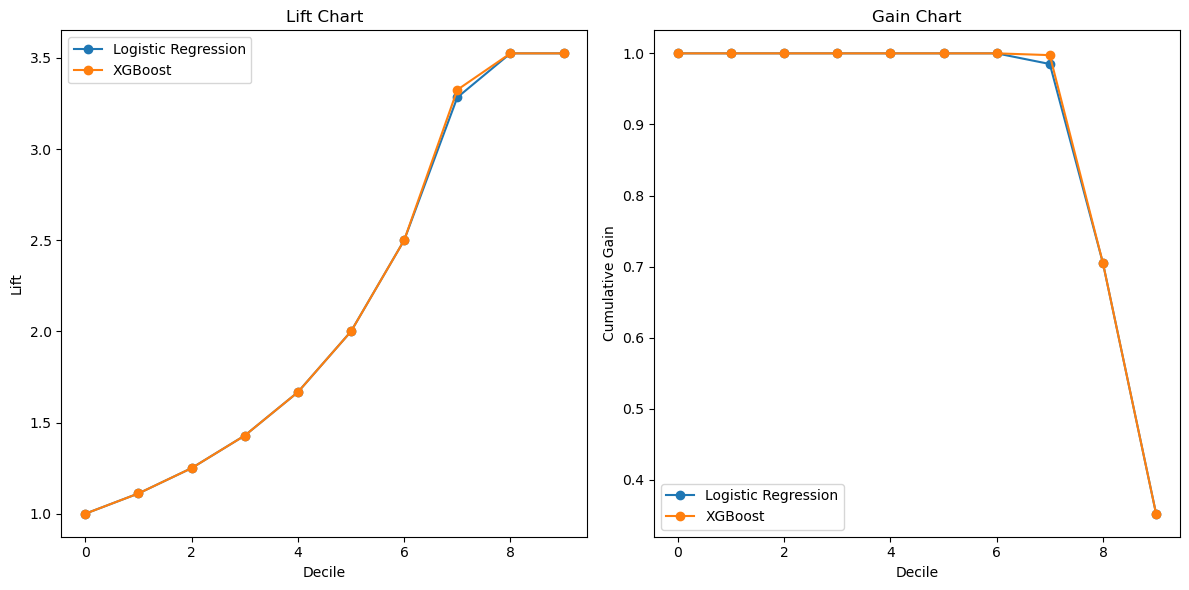

In [29]:
# Plot Lift and Gain charts
plt.figure(figsize=(12, 6))

# Lift Chart
plt.subplot(1, 2, 1)
plt.plot(lift_gain_log['Decile'], lift_gain_log['Lift'], marker='o', label='Logistic Regression')
plt.plot(lift_gain_xgb['Decile'], lift_gain_xgb['Lift'], marker='o', label='XGBoost')
plt.title('Lift Chart')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.legend()

# Gain Chart
plt.subplot(1, 2, 2)
plt.plot(lift_gain_log['Decile'], lift_gain_log['Cumulative Percentage'], marker='o', label='Logistic Regression')
plt.plot(lift_gain_xgb['Decile'], lift_gain_xgb['Cumulative Percentage'], marker='o', label='XGBoost')
plt.title('Gain Chart')
plt.xlabel('Decile')
plt.ylabel('Cumulative Gain')
plt.legend()

plt.tight_layout()
plt.show()



### 11. Append Scores to Original Data

In [31]:
# Append scores to original data
df['logistic_score'] = log_model.predict_proba(X)[:, 1]
df['xgboost_score'] = best_xgb_model.predict_proba(X)[:, 1]

# Display the dataframe with appended scores
df.head()


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,logistic_score,xgboost_score
0,78,0,90022,34.023810,-118.156582,68701,0,1,0.00,8,...,False,False,False,False,False,False,False,False,1.000000e+00,0.004141
1,74,1,90063,34.044271,-118.185237,55668,1,8,48.85,17,...,False,False,False,False,False,False,False,False,1.000000e+00,0.001091
2,71,3,90065,34.108833,-118.229715,47534,0,18,11.33,52,...,False,False,False,False,False,False,False,False,1.000000e+00,0.002331
3,78,1,90303,33.936291,-118.332639,27778,1,25,19.76,12,...,False,False,False,False,False,False,False,False,1.273244e-100,0.001091
4,80,1,90602,33.972119,-118.020188,26265,1,37,6.33,14,...,False,False,False,False,False,False,False,False,1.193783e-89,0.001091


In [32]:
# Calculate deciles for logistic_score
df['logistic_decile'] = pd.qcut(df['logistic_score'], 10, labels=False, duplicates='drop') + 1

# Calculate deciles for xgboost_score
df['xgboost_decile'] = pd.qcut(df['xgboost_score'], 10, labels=False, duplicates='drop') + 1

# Display the dataframe with appended scores and deciles
df.head()


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,logistic_score,xgboost_score,logistic_decile,xgboost_decile
0,78,0,90022,34.023810,-118.156582,68701,0,1,0.00,8,...,False,False,False,False,False,False,1.000000e+00,0.004141,3,4
1,74,1,90063,34.044271,-118.185237,55668,1,8,48.85,17,...,False,False,False,False,False,False,1.000000e+00,0.001091,3,1
2,71,3,90065,34.108833,-118.229715,47534,0,18,11.33,52,...,False,False,False,False,False,False,1.000000e+00,0.002331,3,3
3,78,1,90303,33.936291,-118.332639,27778,1,25,19.76,12,...,False,False,False,False,False,False,1.273244e-100,0.001091,2,1
4,80,1,90602,33.972119,-118.020188,26265,1,37,6.33,14,...,False,False,False,False,False,False,1.193783e-89,0.001091,3,1
